<a href="https://colab.research.google.com/github/Raji-Siva/ARL-Project/blob/master/Inception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/My\ Drive/


/content/gdrive/My Drive


In [0]:
!pip install tensorflow==1.14.

In [0]:
import tensorflow as tf
print(tf.__version__)

Using TensorFlow backend.


In [6]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
import numpy as np # linear algebra
import pandas as pd
from __future__ import absolute_import, division, print_function
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob, os, random
from keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers, losses
from tensorflow.keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [7]:
base_path = '/content/gdrive/My Drive/Garbage classification/Garbage classification'
img_list = img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))
print(len(img_list))

2527


In [9]:

data_dir = '/content/gdrive/My Drive/Garbage classification/Garbage classification'

gen = {
    "train": ImageDataGenerator(
        horizontal_flip=True,
        vertical_flip=True,
        rescale=1. / 255,
        validation_split=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        rotation_range=30,
    ).flow_from_directory(
        directory=data_dir,
        target_size=(300, 300),
        subset='training',
    ),

    "valid": ImageDataGenerator(
        rescale=1 / 255,
        validation_split=0.1,
    ).flow_from_directory(
        directory=data_dir,
        target_size=(300, 300),
        subset='validation',
    ),
}

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


In [10]:

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(300, 300, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.15),
    Dense(1024, activation='relu'),
    Dense(6, activation='softmax')
])

opt = optimizers.Nadam(lr=0.0001)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
87916544/87910968 [==============================] - 8s 0us/step


In [0]:

batch_size = 32
epochs = 50
train_generator = gen["train"]
valid_generator = gen["valid"]
steps_per_epoch = train_generator.n // batch_size
validation_steps = valid_generator.n // batch_size

In [12]:


history = model.fit_generator(generator=train_generator, epochs=epochs, steps_per_epoch=steps_per_epoch,
                              validation_data=valid_generator, validation_steps=validation_steps,
                              )


Epoch 1/50
71/71 [==============================] - 1503s 21s/step - loss: 1.3019 - acc: 0.5299 - val_loss: 0.9206 - val_acc: 0.6384
Epoch 2/50
71/71 [==============================] - 522s 7s/step - loss: 0.9004 - acc: 0.6956 - val_loss: 0.6809 - val_acc: 0.7232
Epoch 3/50
71/71 [==============================] - 498s 7s/step - loss: 0.7414 - acc: 0.7442 - val_loss: 0.7172 - val_acc: 0.7188
Epoch 4/50
71/71 [==============================] - 490s 7s/step - loss: 0.6816 - acc: 0.7629 - val_loss: 0.7047 - val_acc: 0.7366
Epoch 5/50
71/71 [==============================] - 474s 7s/step - loss: 0.6529 - acc: 0.7594 - val_loss: 0.6758 - val_acc: 0.7589
Epoch 6/50
71/71 [==============================] - 462s 7s/step - loss: 0.6261 - acc: 0.7781 - val_loss: 0.5918 - val_acc: 0.7768
Epoch 7/50
71/71 [==============================] - 454s 6s/step - loss: 0.6199 - acc: 0.7812 - val_loss: 0.6003 - val_acc: 0.7857
Epoch 8/50
71/71 [==============================] - 460s 6s/step - loss: 0.5592 -

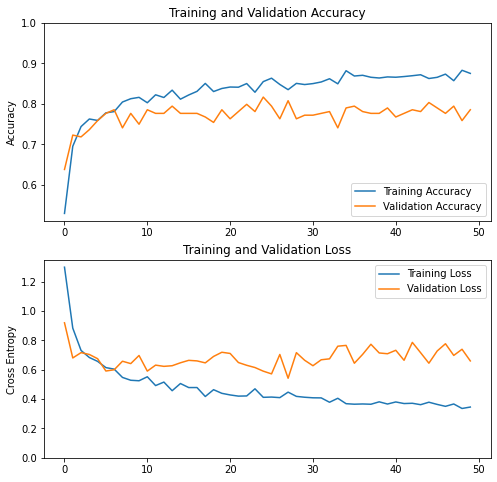

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')


plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

(1, 6)
cardboard


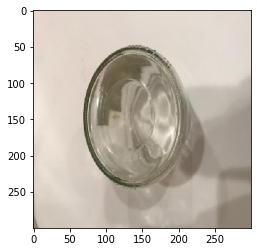

In [23]:
img_path = '/content/gdrive/My Drive/Garbage classification/Garbage classification/glass/glass92.jpg'
img = image.load_img(img_path)
img=np.array(img)/255.0
img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img, dtype=np.uint8)
plt.imshow(img.squeeze())
p=model.predict(img[np.newaxis, ...])
print(p.shape)
path = 'labels.txt'
label = np.array(open(path).read().splitlines())
predicted_class = label[np.argmax(p[0][0], axis=-1)]
print(predicted_class)